## Course 3 Workbook Week 1

In this notebook, I will have all the demonstrations + practical activities from Wk 1 of DA 301 

### Use the Python statsmodels module.

In [ ]:
# Import statsmodel for statistical calculations and 
# ‘TTestIndPower’ class to calculate the parameters.
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

# Specify the three required parameters for the power analysis:
alpha = 0.05 
power = 0.8 
effect = sms.proportion_effectsize(0.13, 0.15) 

# Perform power analysis by using the solve_power() function:
# Specify an instance of ‘TTestIndPower’.
analysis = TTestIndPower() 
# Calculate the sample size and list the parameters.
result = analysis.solve_power(effect, power=power, nobs1=None,
                              ratio=1.0, alpha=alpha) 

# Print the output.
print('Sample Size: %.3f' % result)

This means we need a minimum sample size of 4,721 observations.

### Prepare the data

In [ ]:
# Install the relevant modules:
!pip install scipy

# Import necessary libraries, packages and classes.
import pandas as pd
import math
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file.
df = pd.read_csv('ab_data.csv')

# View the DataFrame.
df.head()

In [ ]:
# Check the metadata.
df.info()

In [ ]:
# Clean the data
# Pandas's duplicated() function to check the user_id column. 
print(df[df.user_id.duplicated()])

In [ ]:
# Use ‘drop_duplicates’ to return the Series without the duplicate values.
df2 = df.drop_duplicates(subset = 'user_id') 

# Check the metadata.
df2.info()

In [ ]:
# Remove unnecessary columns
# Use ‘dropped.drop’ to remove irrelevant columns from the DataFrame. 
# Specify that ‘user_id’ and ‘timestamp’ are columns (i.e. ‘axis 1’). 
df3 = df2.drop(['user_id', 'timestamp'], axis=1)  

# Check the DataFrame.
df3.head()

In [ ]:
# Check for errors.
# Use ‘crosstab’ to compute a simple cross-tabulation between two variables.
pd.crosstab(df3['group'], df3['landing_page'])

# Can see that there are 1006 users in control group who saw new page and shouldnt have
# Can see that there are 1038 users in treatment group who saw old page and shouldnt have
# Need to remove both groups

In [ ]:
# Specify groups to be dropped.
df4 = df3[((df3.group == 'control') & (df3.landing_page == 'old_page')) | (
    (df3.group == 'treatment') & (df3.landing_page == 'new_page'))]

# Print the shape of the new ‘final’ table.
print(df4.shape)
df4['group'].value_counts()

In [ ]:
# Double checking errors are removed.
# Re-check/compute another simple cross-tabulation.
pd.crosstab(df4['group'], df4['landing_page'])

In [ ]:
# So sample size needed is just 4721 but actual available is much bigger. 
# Lets pick randomly from whats available.
# Obtain a simple random sample for control and treatment groups with n = 4721; 
# set random_stategenerator seed at an arbitrary value of 22.
# Obtain a simple random sample for the control group.
c_sample = df4[df4['group'] == 'control'].sample(n=4721,
                                                 random_state=22) 
# Obtain a simple random sample for the treatment group.
t_sample = df4[df4['group'] == 'treatment'].sample(n=4721,
                                                   random_state=22)

In [ ]:
# Join the two samples.  
ab_test = pd.concat([c_sample, t_sample], axis=0)  

# Reset the A/B index.
ab_test.reset_index(drop=True, inplace=True) 

# Print the sample table.
ab_test  

### Analyse the data

In [ ]:
# Calculate basic statistics
# Import library.
from scipy.stats import sem

# Group the ab_test data set by group and aggregate by converted.
conversion_rates = ab_test.groupby('group')['converted']

# Calculate conversion rates by calculating the means of columns STD_p and SE_p.
conversion_rates = conversion_rates.agg([np.mean, np.std,sem])

# Assign names to the three columns.
conversion_rates.columns = ['conversion_rate', 'std_deviation','std_error']  

# Round the output to 3 decimal places.
conversion_rates.style.format('{:.3f}') 

In [ ]:
# Calculate statistical significance

# Import proportions_ztest and proportion_confint from statsmodels.
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Create a subset of control and treatment results.
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

# Determine the count of the control_results and 
# treatment_result sub-datasets and store them in their respective variables.
n_con = control_results.count()
n_treat = treatment_results.count()

# Create a variable ‘success’ with the sum of the two data sets
# in a list format: 
successes = [control_results.sum(), treatment_results.sum()]

# Create a variable ‘nobs’ which stores the values of 
# variables n_con and n_treat in list format. 
nobs = [n_con, n_treat] 

# Use the imported libraries to calculate the statistical values. 
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes,
                                                                        nobs=nobs,
                                                                        alpha=0.05)

# Print the outputs (with lead-in text).
print(f'Z test stat: {z_stat:.2f}')
print(f'P-value: {pval:.3f}')
print(f'Confidence Interval of 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Confidence Interval of 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

## Practical activity: Conduct A/B testing in Python

In [ ]:
# import the necessary libraries
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

In [ ]:
# Perform the power analysis to determine sample size.
effect = sms.proportion_effectsize(0.50, 0.55)   
 
effect,
alpha = 0.05
power = 0.8

analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)

print('Sample Size: %.3f' % result)

In [ ]:
# import the necessary libraries
import pandas as pd
import math
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# read the data set with Pandas
df = pd.read_csv('new_bike_shop_AB.csv')

# print the DataFrame
print(df.shape)
df.head()

In [ ]:
# view DataFrame
df.info()

In [ ]:
# Clean the Data
# Rename the columns.
df_new = df.rename(columns={'IP Address': 'IPAddress', 'LoggedInFlag': 'LoyaltyPage'})

# View the DataFrame.
print(df_new.shape)
df_new.head()

In [ ]:
# Drop duplicate values.
df_new.drop_duplicates(subset ='IPAddress',
                       keep = False, inplace = True)


# Drop duplicate columns.
df_final = df_new.drop(['Unnamed: 0', 'RecordID', 'VisitPageFlag'],
                       axis=1)


# View the DataFrame.
print(df_final.shape)

df_final.info()

## Subset the DataFrame.

In [ ]:
# Split data set into ID1 as treatment and ID2 & ID3 as control groups.
df_final['Group'] = df_final['ServerID'].map({1:'Treatment', 2:'Control', 3:'Control'})

# View DataFrame.
print(df_final.shape)
df_final.head()

In [ ]:
# count the values
df_final["Group"].value_counts()

In [ ]:
# Create two DataFrames.
# You can use any random_state.
c_sample = df_final[df_final['Group'] == 'Control'].sample(n=1565,
                                                           random_state=0) 

t_sample = df_final[df_final['Group'] == 'Treatment'].sample(n=1565,
                                                             random_state=0)

# View the DataFrames.
print(c_sample)
print(t_sample)

In [ ]:
# Perform A/B testing.
# Create variable and merge DataFrames.
ab_test = pd.concat([c_sample, t_sample], axis=0)

ab_test.reset_index(drop=True, inplace=True)

# View output.
ab_test

In [ ]:
# Calculate the conversion rates.
conversion_rates = ab_test.groupby('Group')['LoyaltyPage']


# Standard deviation of the proportion.
STD_p = lambda x: np.std(x, ddof=0)    
# Standard error of the proportion.
SE_p = lambda x: st.sem(x, ddof=0)     

conversion_rates = conversion_rates.agg([np.mean, STD_p, SE_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = ab_test[ab_test['Group'] == 'Control']['LoyaltyPage']
treatment_results = ab_test[ab_test['Group'] == 'Treatment']['LoyaltyPage']

n_con = control_results.count()
n_treat = treatment_results.count()

successes = [control_results.sum(), treatment_results.sum()]

nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes,
                                                                        nobs=nobs,
                                                                        alpha=0.05)

print(f'Z test stat: {z_stat:.2f}')
print(f'P-value: {pval:.3f}')
print(f'Confidence Interval of 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Confidence Interval of 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

## Summarise results and explain your answers
The change to the homepage slightly decreased the click through to the log in page.

The p-value is well over the Alpha value of 0.05, meaning the null hypothesis cannot be rejected.

## 1.1.8 Conducting a what-if analysis with Python

In [ ]:
# Install Python Sensitivity Analysis . 
!pip install sensitivity  

# This might take some time to install.

In [ ]:
# Defines classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd
# Import in-built module for generating random numbers. 
import random 
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 

In [ ]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented programming (OPP).
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int = 300000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    savings_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1500000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data 

In [ ]:
# Get the wage at a given year from the start of the model based 
# on the cost of living raises and regular promotions.
def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)  
    
   # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [ ]:
# Show the first four salaries in the range and 
# print the results using the f-string.
for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

In [ ]:
# Change to show the salaries for the first 10 years 
# only and print the results using the f-string:
for i in range(10):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

In [ ]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate.
def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [ ]:
# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year.
def wealth_year(data: ModelInputs, year, prior_wealth):
                cash_saved = cash_saved_during_year(data, year)
                wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
                return wealth
        

In [ ]:
# Start with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth

In [ ]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

In [ ]:
years = years_to_retirement(model_data)

## 1.1.9 Practical activity: Summarising model outputs

In [ ]:
# import the necessary libraries
import pandas as pd
import random
%matplotlib inline
from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

In [ ]:
# Create a class and instance.
@dataclass
class ModelInputs:
    starting_salary: int = 250000
    promos_every_n_years: int = 2
    cost_of_living_raise: float = 0.03
    promo_raise: float = 0.10
    savings_rate: float = 0.15
    interest_rate: float = 0.05
    desired_cash: int = 1000000
        
model_data = ModelInputs()

model_data

In [ ]:
# Calculate wage at a given year from start of the model based on cost of living, 
# raises and regular promotion.
def wages_year(data: ModelInputs, year)->float:
    """
    Gets the wage at a given year from the start of the model based 
    on cost of living raises and regular promotions.
    """
    # Every n years we have a promotion, so dividing the years and taking 
    # out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)
    
    # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

In [ ]:
def cash_saved_during_year(data: ModelInputs, year):
    """
    Calculated the cash saved within a given year, by first 
    calculating the salary at that year then applying the 
    savings rate.
    """
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [ ]:
def wealth_year(data: ModelInputs, year, prior_wealth):
    """
    Calculate the accumulated wealth for a given year, 
    based on previous wealth, the investment rate,
    and cash saved during the year.
    """
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [ ]:
# Starting with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth.
    prior_wealth = wealth

In [ ]:
# Runs the retirement model; collects salary and wealth information year by year
# and stores it in a DataFrame for further analysis.
def get_salaries_wealths_df(data):
    # Start with no cash saved.
    prior_wealth = 0   
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  

    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = wages_year(data, year)
        wealth = wealth_year(data, year, prior_wealth)

         # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth 

        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, salary, wealth))
        
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [ ]:
# Format DataFrame for display.
get_salaries_wealths_df(model_data)

In [ ]:
# Save the function results into the DataFrame.
results_df = get_salaries_wealths_df(model_data).round()

# View the DataFrame.
results_df.head()

### Create Visualisation

In [ ]:
# Visualise wage or salary change over time.
results_df.plot( 'Year' , 'Salary')

In [ ]:
# Visualise wealth change over time.
results_df.plot( 'Year' , 'Wealth')

## 1.1.10 Running a sensitivity and scenario analysis in Python

In [ ]:
# Define the function that accepts the individual parameters.
def years_to_retirement_separate_args(
    # List the parameters and set their values.
    starting_salary=60000, 
    promos_every_n_years=5, 
    cost_of_living_raise=0.02,
    promo_raise= 0.15, 
    savings_rate=0.25, 
    interest_rate=0.05, 
    desired_cash=1500000):  
    # Update the values of the parameters:
    data = ModelInputs(
        starting_salary=starting_salary, 
        promos_every_n_years=promos_every_n_years, 
        cost_of_living_raise=cost_of_living_raise, 
        promo_raise=promo_raise, 
        savings_rate=savings_rate, 
        interest_rate=interest_rate, 
        desired_cash=desired_cash)
       
    return years_to_retirement(data, print_output=False)

# Call the function.
years_to_retirement_separate_args()

In [ ]:
# Generate Random values for the input variable
# Use Python’s ‘list comprehensions’ syntax to make it easier to adjust the inputs. 
# Use i as a temporary variable to store the value’s position in the range:
sensitivity_values = {
    'starting_salary': [i * 10000 for i in range(4, 8)],
    'promos_every_n_years': [i for i in range(4, 8)],
    'cost_of_living_raise': [i/100 for i in range(1, 4)],
    'promo_raise': [i/100 for i in range(10, 25, 5)],
    'savings_rate': [i/100 for i in range(10, 50, 10)],
    'interest_rate': [i/100 for i in range(3, 8)],
    'desired_cash': [i * 100000 for i in range(10, 26, 5)]}

In [ ]:
# Run the Python’s SensitivityAnalyzer with the all the assigned inputs:
sa = SensitivityAnalyzer(
    sensitivity_values,
    years_to_retirement_separate_args,
    result_name='Years to Retirement',
    reverse_colors=True,
    grid_size=3)

In [ ]:
# Display the results using a DataFrame.
styled_dict = sa.styled_dfs(num_fmt='{:.1f}') 

In [ ]:
#  The function to calculate ‘bad’ economy:
bad_economy_data = ModelInputs(
    starting_salary=100000,
    promos_every_n_years=8,
    cost_of_living_raise=0.01,
    promo_raise=0.07,
    savings_rate=0.15,
    interest_rate=0.03)

# The function for ‘good’ economy:
good_economy_data = ModelInputs(
    starting_salary=500000,
    promos_every_n_years=4,
    cost_of_living_raise=0.03,
    promo_raise=0.20,
    savings_rate=0.35,
    interest_rate=0.06)

cases = {
    'Bad': bad_economy_data,
    'Normal': model_data, # Original inputs were set to assume a ‘normal’ economy
    'Good': good_economy_data}

In [ ]:
# Run the model with the three scenarios and print the results:
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    print(f'It would take {ytr} years to retire in a {case_type} economy.')

In [ ]:
# Assigning Probabilities

# These values are arbitrary and are only used for demonstration. 
case_probabilities = {
    'Bad': 0.2,
    'Normal': 0.5,
    'Good': 0.3}

In [ ]:
# Run the model by taking the expected value over the three cases;
# print the results with a text string:
expected_ytr = 0
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    weighted_ytr = ytr * case_probabilities[case_type]
    expected_ytr += weighted_ytr
    
    print(f'It would take {expected_ytr:.0f} years to retire given a \
    {case_probabilities["Bad"]:.0%} \
    chance of a bad economy and {case_probabilities["Good"]:.0%} \
    chance of a good economy.')

## Completing a What-if Scenario Analysis

### Prepare workstation

In [ ]:
# Import the necessary libraries.
import pandas as pd
import random
%matplotlib inline
from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Specify the model input and create a class

In [ ]:
# Create a class and instance.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

### Create a function to calculate ROI

In [ ]:
# Function to calculate ROI. 
def roi_per_year(data: ModelInputs):
    year = 0
    prior_roi = 0
    
    while year < 6:
        year = year + 1
        # print(year)
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no

        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        print(f'The ROI at year {year} is {roi:,.0f}%.')
        
        prior_roi = roi
        
    return roi

# View output.
roi_per_year(model_data)

In [ ]:
# Function to create a DataFrame as df: 
def roi_per_year_df(data: ModelInputs):
    year = 0
    prior_roi = 0
    df_data_tups = []
    
    for year in range(6):
        year = year + 1
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no
        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        # print(f'The ROI at year {year} is {roi:,.0f}%.')
        
        prior_roi = roi 
        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, roi))
        # Now create the DataFrame.
        df = pd.DataFrame(df_data_tups, columns=['Year', 'ROI in %'])
        
    return df

# View DataFrame.
roi_per_year_df(model_data)

### Create a function to show ROI for each year and a single year

In [ ]:
# Function to give annual ROI for each year. 
def annualized_roi_per_year(data: ModelInputs):
    year = 0
    prior_roi = 0

    for year in range(6):
        year = year + 1
        # print(year)
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no
        roi = prior_roi + ((net_return)/(cost_of_investment))*100 
        print(f"ROI :{roi}")
        
        # annual_roi = [((1 + (roi/100))**(1/year)-1)*100]
        annual_roi = ((1 + (roi/100))**(1/year)-1)*100
        print(f'The annualized ROI at year {year} is {annual_roi}%.')
        prior_roi = roi 
        
    return annual_roi

# View output.
annualized_roi_per_year(model_data)

In [ ]:
# Function to return annualized ROI for a single year. 
def anl_roi_per_year(data: ModelInputs, print_output=True):
    year = 0
    prior_roi = 0
    
    if print_output:
        # \n makes a blank line in the output.
        print('Anuual ROI over time:') 
        
    while year < 10:
        year = year + 1
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no
        
        # Cost of investment is simply the buying price of each 
        # share multiplied by the number of shares purchased, 
        # eg. 10 shares at $5 means the cost of investment is £50.
        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        print(f"roi :{roi}")
        
        anl_roi = ((1 + (roi/100))**(1/year)-1)*100
        
        return anl_roi
    
# view output
anl_roi_per_year(model_data)

### Run the model based on some changes

#### Initial Invest increases by 10% and decreases by 10%

In [ ]:
# investment = buying price * share 
# NOTE: Assuming that instead of investment, the variable to be used is share no.

In [ ]:
# Buying Share per share increases by 10%.
@dataclass
class ModelInputs:
    share_no : int = 550
    buying_price: int = 11.5
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

In [ ]:
# Buying Share per share decreases by 10%.
@dataclass
class ModelInputs:
    share_no : int = 450
    buying_price: int = 11.5
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

#### Buying price increases by 15% and decreases by 10%

In [ ]:
# Buying price per share increases by 15%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 11.5
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

In [ ]:
# Buying price per share decreases by 15%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 8.5
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

#### Selling price increases by 20% and decreases by 15%

In [ ]:
# Selling price per share increases by 20%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 18
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

In [ ]:
# Selling price per share decreases by 20%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 12
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

#### Annual dividend increases by 25% and decreases by 20%

In [ ]:
# Annual dividend increases by 25%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 502.5
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

In [ ]:
# Selling price per share decreases by 20%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 497.5
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

#### Create a good and bad scenario

In [ ]:
# Create a good bad scenario.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

In [ ]:
bad_economy_data = ModelInputs(
    share_no = 100,
    buying_price = 600,
    dividend = 200,
    selling_price = 200,
    costs = 900)

good_economy_data = ModelInputs(
    share_no= 800,
    buying_price= 30,
    dividend= 600,
    selling_price= 45,
    costs= 100)

cases = {
    'Bad': bad_economy_data,
    # Original inputs were set to assume a normal economy.
    'Normal': model_data, 
    'Good': good_economy_data}

for case_type, case_inputs in cases.items():
    ytr = anl_roi_per_year(case_inputs, print_output=False)
    
print(f'Annualized ROI would be {ytr} is case of {case_type} economy.')

#### Perform a what if scenario

In [ ]:
# Run what-if analysis.
def analyzer_what_if(
    
    share_no  = 500,
    buying_price = 10,
    dividend = 500,
    selling_price = 15,
    costs = 125):
    data = ModelInputs(
        share_no=share_no, 
        buying_price=buying_price, 
        dividend=dividend, 
        selling_price=selling_price,  
        costs=costs)
    
    return annualized_roi_per_year(data)

analyzer_what_if()

In [ ]:
def analyzer_what_if(    
    share_no  = 500,
    buying_price = 10,
    dividend = 500,
    selling_price = 15,
    costs = 125):
    data = ModelInputs(
        share_no=share_no, 
        buying_price=buying_price, 
        dividend=dividend, 
        selling_price=selling_price,  
        costs=costs)
    
    return anl_roi_per_year(data)

analyzer_what_if()

In [ ]:
# It is certainly possible to specify all these hard-coded but 
# using list comprehensions makes it easy to adjust.
sensitivity_values = {
    'share_no': [i * 100 for i in range(4, 8)],
    'buying_price': [i*10 for i in range(4, 8)],
    'dividend': [i *100 for i in range(1, 4)],
    'selling_price': [i *10 for i in range(10, 25, 5)],
    'costs': [i * 100 for i in range(3, 10)],
    # 'interest_rate': [i/100 for i in range(3, 8)],
    # 'desired_cash': [i * 100000 for i in range(10, 26, 5)]
}

sensitivity_values

In [ ]:
sa = SensitivityAnalyzer(
    sensitivity_values,
    analyzer_what_if,
    result_name='Annual ROI',
    reverse_colors=True,
    grid_size=3)

In [ ]:
# Create a DataFrame.
sa.df

In [ ]:
# Create a visualisation.
sa.plot()

In [ ]:
# Display results as a DataFrame.
sa.styled_dfs()

#### Identify best case investment scenario

In [ ]:
@dataclass
class ModelInputs:
    share_no : int = 600
    buying_price: int = 20
    dividend: int = 800
    selling_price: int = 22
    costs: int = 100
        
model_data = ModelInputs()
model_data

In [ ]:
def annualized_roi_per_year_for_required_roi(data: ModelInputs):
    year = 0
    prior_roi = 0
    
    for year in range(19):
        year = year + 1        
        net_return = (data.selling_price - data.buying_price) * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no

        roi = prior_roi + ((net_return)/(cost_of_investment))*100 
        annual_roi = ((1 + (roi/100))**(1/year)-1)*100
        
        prior_roi = roi 
    print(f'The annualized ROI at year {year} reaches {annual_roi}% for total shares of {model_data.share_no}\
    with a buying price of {model_data.buying_price}, selling price of {model_data.selling_price}')
    
annualized_roi_per_year_for_required_roi(model_data)

## 1.2.3 Calculating simple linear regression with Python

In [ ]:
# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Setting up regression analysis function
def estimate_coef(x, y):
    # Specify the size or number of points.
    n = np.size(x)  

    # Calculate the mean of x and y.
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate the cross-deviation and deviation around x.
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x

    # Calculate the regression coefficients.
    m = SS_xy / SS_xx
    b = mean_y - m*mean_x

    return (b, m)

In [ ]:
# Setting up regression line plot.
def plot_regression_line(x, y, b):
    # Use scatterplot to plot the actual points.
    plt.scatter(x, y, color = "g",
               marker = "o", s = 30)
 
    # Set the predicted response vector using the linear equation.
    y_pred = b[0] + b[1]*x
 
    #  Plot the regression line (in red).
    plt.plot(x, y_pred, color = "r")
 
    # Add two labels for clarity.
    plt.xlabel('x')
    plt.ylabel('y')
 
    # Set a function to display the plot.
    plt.show()

In [ ]:
# Adding data.
def main():
    # Enter small data set by hand as an array.
    x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
    y = np.array([20000, 22000, 23500, 26000, 25000, 28250,
                  29300, 33000, 34255, 45000])

    # Calculate the coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(b[0], b[1]))

    # Plot the regression line (i.e. y = mx + c).
    plot_regression_line(x, y, b)
 
main()

### Simply functions and calculations with NumPy

In [ ]:
# Simplify functions and calculations with NumPy 
# Re-enter the values of x and y in your Notebook.
x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
y = np.array([20000, 22000, 23500, 26000, 25000, 28250, 29300, 33000, 34255, 45000])

# Create a basic scatterplot.
plt.plot(x, y, 'o')  

# Obtain m (slope) and c (intercept) of the linear regression line.
m, c = np.polyfit(x, y, 1)

# Add the linear regression line to the scatter plot.
plt.plot(x, m*x+c)
print(m)
print(c)

## The OLS method and the statsmodels package

In [ ]:
# Import statsmodels, NumPy, Pandas, and Matplotlib.
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and read the data file:
df_test = pd.read_csv('test.csv')

df_test

In [ ]:
# Define the variables.
# Define the dependent variable.
y = df_test['y'] 

# Define the independent variable.
x = df_test['x'] 

# Check for linearity.
plt.scatter(x, y)  

In [ ]:
# Fit the model
# OLS uses an R-style formula in Python to fit statistical models.
# The formula looks like this: ‘y ~ x’.

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df_test).fit()

# Print the regression table.
test.summary() 

In [ ]:
# Print the other useful values.
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

In [ ]:
# Create a linear equation and plot the regression model.
# Set the the x coefficient to ‘1.0143’ and the constant to ’0.4618’ to generate the regression table.
y_pred = 1.0143 * df_test['x'] - 0.4618

y_pred

In [ ]:
# Finally lets plot our values on a scatterplt using Matpltlib.
# To do this we need to
# Plot the data points
# plot the line
# Set the x and y limits on the axes.

import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

# Recall that in a simple linear regression model analysts try to ifn the line of best fit
# by minimizing residuals = reduce the distance between data points and regression line down to 0.
# As you can see below, the line of best fit here fits the data points almost perfectly
# x/y intercept is very nearly at 0!


# By using OLS and statsmodels module, we are able to minimise the residuals and 
# Create a more accurate line of best fit!

## 1.2.4 Practical Activity: fitting a data set using OLS Method.

In [ ]:
# Prepare workstation
# import the necessary libraries
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import DataSet
df_test = pd.read_csv('loyalty_club.csv')

# View DataFrame.
df_test

In [ ]:
# Define the Variables.
# Dependent variable.
y = df_test['Yearly Amount Spent'] 

# Independent variable.
X = df_test['Length of Membership']

# Check for linearity.
plt.scatter(X,y)

In [ ]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = df_test).fit()

test.summary()

In [ ]:
# Create linear equation
# x coef: 64.2187
# constant coef: 272.3998

y_pred = 64.2187 * X + 272.3998	

y_pred

In [ ]:
# Plot the regression

import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')

## 1.2.5 Linear Regression with scikit learn

Scikit Learn or sklearn is Pythons standard machine learning library. Amongst many other things, we can use sklearn to calculate simple and multiple linear regression. 

In [ ]:
# Prepare workstation.
# Install the necessary modules.
!pip install scipy

In [ ]:
# Import the necessary libraries, packages and modules.
import statsmodels.api as sm 
from sklearn import datasets 
import numpy as np  
from sklearn import linear_model 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Read the 'salary_data.csv' file.
data = pd.read_csv('salary_data.csv') 

# Print the table.
data.head() 

In [ ]:
# More info about the DataFrame.
data.info() 

In [ ]:
# Determine basic statistics
# Print descriptive statistics
data.describe()

In [ ]:
# Run the regression
# Define the dependent variable.
y = data['Salary'].values.reshape(-1, 1) 

# Define the independent variable.
x = data['YearsExperience'].values.reshape(-1, 1) 

In [ ]:
# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

In [ ]:
# Make Predictions.
# Print the target values.
lm.predict(x)  

In [ ]:
# Call the intercept.
lm.intercept_ 

In [ ]:
# Estimate co-efficients.
lm.coef_ 

In [ ]:
# Create a scatterplot (with red data points). 
plt.scatter(x, y, color = 'red')  

# Create a regression line in green.
plt.plot(x, lm.predict(x), color = 'green') 

#Set the title and labels for the graph.
plt.title("Years of Experience vs Ave. Salary") 
plt.xlabel("Years of Experience") 
plt.ylabel("Ave. Salary")

# Print the graph. 
plt.show() 

In [ ]:
# Apply the linear regression model
# Use the predict() method with an array to call the 
# salaries for each number of years’ experience.
predictedSalary = lm.predict([[5],[10],[15],[20],[25],[30]])  

# Print the results.
print(predictedSalary)  

### Training and test sets
Splitting the data before building the model is a general technique used in machine learning that allows data analysts to evaluate the performance of their models.

A related concept is overfitting, which is when a statistical model fits so closely with its training data that the algorithm cannot make accurate predictions on unseen data. This may sound counterintuitive, as having a model fit the data sounds like a good thing. However, if the algorithm trains too long on the sample data, which is limited, it starts to learn irrelevant information within the data set, becoming useful only in terms of its training data. The algorithm therefore cannot generalise to new data and, as a result, is unable to perform classification or prediction tasks. 

#### Run the regression on subsets

To get started with the train_test_split module, you would do the following. (Remember to follow along in the same Notebook.)

- Import the train_test_split module from sklearn.
- Create the subset with a 50/50 split.
- Control the shuffling using random_state (randomly applied to the data before the split to avoid values varying).

In [ ]:
#  Import the sklearn module.
from sklearn.model_selection import train_test_split 

# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variable.
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5, 
                                                 random_state=100) 

In [ ]:
# To minimise residuals, run a regression test & visualise the training data.
# Linear regression; fitting the model.
lm.fit(x_train,y_train) 

In [ ]:
# Next predict the values in the training data set using y_pred function
# Predict the training set values.
y_pred = lm.predict(x_train) 

Now to visualise the training data. Remember that the training data is half of the total data set picked at random. To do this, 

- Create a scatterplot with red data points.
- Create the regression line in green.
- Set the title and legends for the graph.
- Print the graph.

In [ ]:
# Create a scatterplot with regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Years of Experience vs Ave. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Ave. Salary") 

# Print the graph. 
plt.show()  

In [ ]:
# Now check how actual model is performing.
# To do this, check the R squared value of the training data
# Print R-squared value of the training data.
print(lm.score(x_train,y_train)) 

# This is a strong R-squared value, as it is higher than 0.7
# it explains almost 94% of the dependent variable

In [ ]:
# Calculate intercept and coefficient values
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_) 

### Testing the model

We created a 50/50 split of the original data set into train and test data sets. We created and fitted the model with the train data set. The final piece of the puzzle is to test the accuracy of our linear model with the test data set.

The process and code snippets are essentially the same. Replace train with test and compare the outputs.

In [ ]:
# Select the model
# Linear regression; fitting the model.
lm.fit(x_test,y_test) 

In [ ]:
# Predict the test set values.
# Predict the test set values.
y_pred = lm.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Years of Experience vs Ave. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Ave. Salary") 

# Print the graph. 
plt.show() 

In [ ]:
# Print R-squared, intercept and coefficient values
# Print R-squared value of the test data.
print(lm.score(x_test,y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

## 1.2.6 Practical activity: Finding the best fit line

The best-fit line (or line of best fit) is the line that best describes the relationship between variables in a linear regression model. 


### Prepare the workstation

In [ ]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### Import the data set

In [ ]:
# Import the data set.
df = pd.read_csv('Ecommerce_data.csv')

# View the DataFrame.
df.head()

In [ ]:
# Replace the missing values with 0.
df.fillna(0, inplace=True)

### Define the variables

In [ ]:
# Choose your variables.
X = df['avg_no_it'].values.reshape(-1, 1) 
y = df['Median_s'].values 

### Split the data set

In [ ]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

### Run a linear equation

In [ ]:
# Run linear regression model.
lr = LinearRegression()

In [ ]:
# Fit the model on the training data.
lr.fit(x_train, y_train)

In [ ]:
# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

### Plot the regression

In [ ]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Avg no of items vs Median of Seller Business(Training Data)")
plt.xlabel("Avg no of items")
plt.ylabel("Median of Seller Business")

plt.show()

In [ ]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Avg no of items vs Median of Seller Business(Testing Data)")
plt.xlabel("Avg no of items")
plt.ylabel("Median of Seller Business")

plt.show()

### Print the values

In [ ]:
# Print the R-squared value.
print(lr.score(x_train,y_train))

In [ ]:
print("Intercept value: ", lr.intercept_)
print("Coffecient value: ", lr.coef_)

#### Notes

- The R-squared tells us that the model is explaining a fraction over 50% of the model.
- The intercept value of -35.99 tells us that as the low stat variable increases by 1, the predicted value of the Median_s decreases by -35.99

## 1.2.7 Limitations and assumptions

Explore:
- simple linear regression's limitations and instances where it doesnt work
- underlying assumptions behind simple linear regression

### Limitations


#### Sensitivity to outliers 
Outliers can have a massive effect on regression analysis.

#### The limits of linearity 
Because simple linear regression looks only at the linear relationship between dependent and independent variables, it assumes there is a straight-line relationship between them. This can sometimes be incorrect. 
In the real world, the relationship might be curved (e.g. the ratio of income to age rises early on, plateaus later in adult life, and drops off at retirement), and there may also be a higher degree polynomial with multiple peaks.  

#### Multiple variables
For simple linear regression to work, there needs to be a single dependent variable and a single independent variable. Using more than one of each of these variables will not suit simple linear regression. Of course, more than one independent variable is common in real life, so we use multiple linear regression for these cases.

#### A focus on the mean
Simple linear regression examines the relationship between the mean of the dependent variable and the independent variable. The mean of a variable, however, is not a complete description of said variable; therefore, linear regression cannot in principle be a complete description of the relationship between variables.

### Assumptions

Assumptions that are directly related to all types of regression analysis need to be checked in order to determine the accuracy of a predictive model.

#### Independent variables are not dependent on dependent variables
Exogeneity is a usual, but important, assumption in regression analysis. Exogeneity tells us that the independent variable (x) is not dependent on the dependent variable (y). In other words,  is not affected by any other variables in the model. 

A variable is exogenous if the conditional distribution (i.e. a probability distribution) for a subpopulation of y given x does not change with modification of the process generating x.

#### Residuals are not dependent
Another assumption is that successive residuals should be independent. In other words, there should be no pattern to the residuals (which, recall, describe how observed data differs from sample population data), nor should they be highly correlated. When successive residuals are correlated, it is called autocorrelation or ‘serial correlation’. Autocorrelation normally occurs when using time series data: what happens one year tends to be correlated with what happens the next year.

A simple way to check this assumption is to create a residual time-series plot, where you plot residuals against time.

Or you can use the Durbin-Watson statistic, a statistical test that detects autocorrelation in residuals from a regression analysis.The equation itself is quite complex, but luckily we can run it in Python with statsmodels using the durbin_watson() function on the residuals of your OLS model and see it when we print the OLS summary.

Essentially, the Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 suggests no autocorrelation in the sample, while values between 0 and 2.0 suggest positive autocorrelation and 2 to 4 suggest negative autocorrelation. The closer to 2.0, the better.

Positive autocorrelation is when the increase observed in a time interval leads to a proportionate increase in the lagged time interval. Negative autocorrelation is the converse, where the observed increase is followed by a proportionate decrease. 

#### There are no significant outliers and missing values
The most common way data analysts deal with outliers is to calculate the standard deviation. Data analysts don't assign the outliers with some other values because it harms or compromises the analysis. Various replacement techniques exist and the choice of their use is situational dependent.

#### Residuals follow a normal distribuiton
Valid inferences from regression models require/assume that residuals follow a normal distribution, as normally distributed residuals mean normally distributed regression coefficients.

To check this, we can use histograms or Q-Q plots. Q-Q plots are plots of two quantiles (such as the median) against each other. Once plotted, a straight line at a roughly 45-degree angle suggests that the distribution is normal.

If you find that normality is off, you can first try to verify that no outliers are impacting the distribution. A second option is to apply a nonlinear transformation to one or both of the variables, either through log, square root, or reciprocals. 

There are other formal statistical tests that can check for normality, such as the Kolmogorov-Smironov, Jarque-Barre, or Shapiro-Wilk tests, although these tests are sensitive to larger sample sizes.

#### The relation between each predictor and the dependent variable is linear
The linearity assumption states that the relation between each predictor and the dependent variable is linear.

#### Different samples have the same variance
Homoscedasticity is a statistical concept where the variances of the residuals along the regression line remain similar all through the line or, in other words, the residuals have constant variance at every level of x. Without homoscedasticity, the standard errors of the regression coefficient estimates are invalid – but without the model picking this up. This means that you might declare a term as statistically significant when it actually isn’t.  

We can check for homoscedasticity by plotting the model predictions, or fitted values, and residuals in a scatterplot. Residuals need to be equal across the regression line. 

The cone-like shape is a sign of heteroscedasticity, the opposite of homoscedasticity, where the variability of a variable is unequal across the values; in other words, there is an uneven change in the spread of residuals over the range of values.

### Using statsmodels to check homoscedasticity 
Another method to check for homoscedasticity is to run statistical tests in Python using the statsmodels package. We’ll use the Breusch–Pagan test to check homoscedasticity. 

In [ ]:
# Importing the preliminary packages
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [ ]:
# Importing the test data set and run the OLS on the data.
# Import the test data set and run the OLS on the data.
df_test = pd.read_csv('test.csv')
f = 'y ~ x'
test = ols(f, data = df_test).fit()

In [ ]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [ ]:
# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

# The p-value of the Lagrange multiplier (LM) test is 0.2882, which is bigger/greater than 0.05, 
# the assigned significance level. Therefore, we fail to reject the H0 
# confirm that heteroscedasticity is not present in the model. 

If, however, the LM p-value is smaller/less than 0.05, then we have a problem. If we find evidence of heteroscedasticity, we have three options: 

- Assign a weight, using weighted least squares regression, to each data point based on the variance of its fitted value, giving small weights to data points with higher variances, which then shrinks their squared residuals.
- Transform the dependent variable by taking its log, square root, or reciprocal. This effectively re-scales the data and pulls in extreme observations.
- Redefine the dependent variable by using a rate instead of a raw value, as this reduces the variability that normally occurs among larger populations.

The assumptions of homoscedasticity, linearity, and normality (i.e. normal distribution) are a little more complicated than the first three assumptions we listed (i.e. of exogeneity, autocorrelation, and assumptions around significant outliers or missing values), but they can be checked with Excel or Python. If one or more of these assumptions are violated, we may get misleading or unreliable results from our linear regression, so it is worthwhile checking for these before running a regression

## 1.3.1 Capital Asset Pricing Model: Linear regression at work

CAPM, as the name suggests, is a pricing model used to calculate relationship between risk and returns on investment. In finance, pricing models are used to find the price of financial assets by estimating an expected return over a period of time.

The equation is applied to whatever stock return or scenario investors want to investigate, and the outputs of various returns are compared to see which stock has reasonable, or reachable, returns.

CAPM describes the relationship between systematic risk and expected returns for assets, primarily stocks (i.e. a unit of ownership of a company, a share/fraction of a business). CAPM tells us the expected return of an investment, given that investment’s characteristics

### Types of risk

#### Systematic risk 

Sometimes called market risk, volatility, or undiversifiable risk is the risk inherent to a market segment or even an entire market. Systematic risk is generally influenced by larger, sometimes global, factors and is both unpredictable and hard to avoid. For instance, the threat of a stock market crash is a systematic risk.

#### Expected returns

The profits or losses that investors expect from an investment that has a known historical rate of return (RoR). The RoR is an investment’s net gain or loss over a specific time, usually displayed as a percentage of the initial cost of the investment. Significantly, expected returns are a form of predictive analytics as they use historical data to make predictions about future returns through a calculation that multiplies potential outcomes by the chances of them occurring. 

If we consider the CAPM equation as a single factor linear regression equation, Rf is the intercept and beta is the slope. 

## 1.3.3 Finding the return for S&P 500 Stocks

#### Prepare your workstation

In [2]:
!pip install pandas_datareader

In [3]:
#import all the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import datetime
import time

from sklearn.linear_model import LinearRegression
from pandas_datareader import data as web

#### Set the start and end date

In [4]:
start = datetime.datetime(2020,3,1)
end = datetime.datetime(2022,7,1)

#### Pull data for Tesla from Yahoo Finance & Save as DataFrame

In [6]:
df_spy = web.DataReader('SPY','yahoo',start,end)

df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,309.160004,294.459991,298.209991,309.089996,238703600.0,297.220978
2020-03-03,313.839996,297.570007,309.500000,300.239990,300139100.0,288.710846
2020-03-04,313.100006,303.329987,306.119995,312.859985,176613400.0,300.846222
2020-03-05,308.470001,300.010010,304.980011,302.459991,186366800.0,290.845612
2020-03-06,298.779999,290.230011,293.149994,297.459991,228667200.0,286.037598


In [7]:
df_tesla = web.DataReader('TSLA','yahoo',start,end)

df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,148.738007,137.334000,142.251999,148.723999,100975000.0,148.723999
2020-03-03,161.395996,143.222000,161.000000,149.102005,128920000.0,149.102005
2020-03-04,153.304001,144.945999,152.792007,149.899994,75245000.0,149.899994
2020-03-05,149.149994,143.613998,144.753998,144.908005,54263500.0,144.908005
2020-03-06,141.399994,136.854004,138.000000,140.695999,63314500.0,140.695999


#### Check relationships and cumulative returns

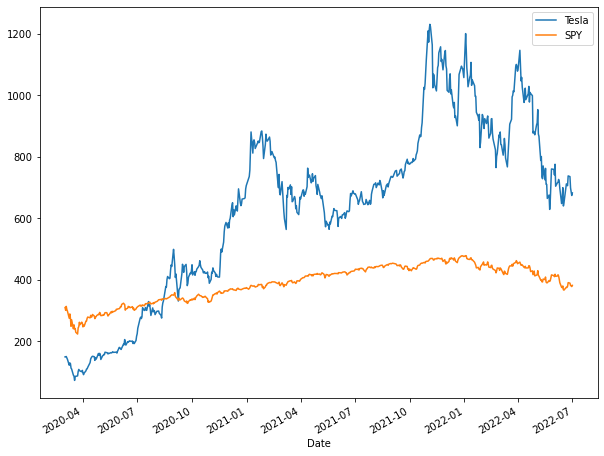

In [8]:
# Plot the data (Close) for both stocks.
df_tesla['Close'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

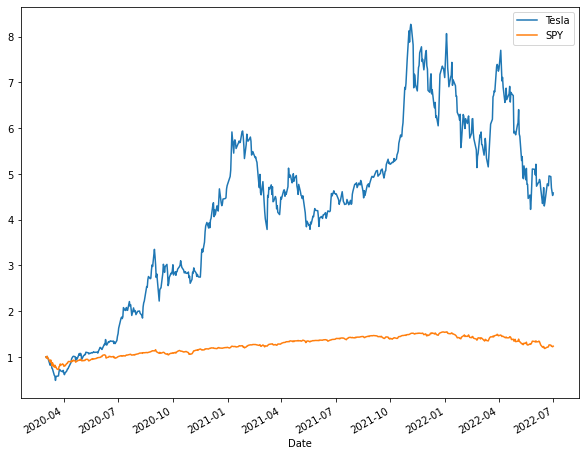

In [9]:
df_tesla['Cumu'] = df_tesla['Close']/df_tesla['Close'].iloc[0] 
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

df_tesla['Cumu'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

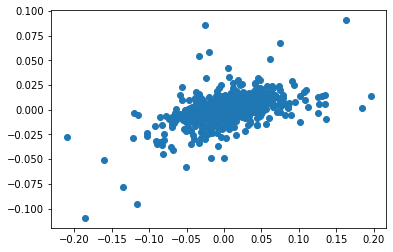

In [10]:
df_tesla['daily_ret'] = df_tesla['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)
plt.scatter(df_tesla['daily_ret'],df_spy['daily_ret'])

#### Draw Trendline

In [11]:
daily_prices = pd.concat([df_tesla['Close'], df_spy['Close']], axis=1)
daily_prices.columns = ['Tesla', 'SPY']

print(daily_prices.head())

                 Tesla         SPY
Date                              
2020-03-02  148.723999  309.089996
2020-03-03  149.102005  300.239990
2020-03-04  149.899994  312.859985
2020-03-05  144.908005  302.459991
2020-03-06  140.695999  297.459991


In [12]:
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0) 
print(clean_daily_returns.head())

               Tesla       SPY
Date                          
2020-03-03  0.002542 -0.028632
2020-03-04  0.005352  0.042033
2020-03-05 -0.033302 -0.033242
2020-03-06 -0.029067 -0.016531
2020-03-09 -0.135725 -0.078094


#### Linear Regression Analysis

In [13]:
X = clean_daily_returns['SPY'].values.reshape(-1, 1)
y = clean_daily_returns['Tesla'].values.reshape(-1, 1)

In [14]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [15]:
lr.coef_

array([[1.45021103]])

In [16]:
lr.intercept_

array([0.00289946])

#### Draw Line of Best Fit

In [17]:
# x coef: 1.34497477
# Constant coef: 0.00489288.
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏.
y_pred =  lr.coef_ * X + lr.intercept_
y_pred

array([[-3.86236459e-02],
       [ 6.38562164e-02],
       [-4.53080026e-02],
       [-2.10741416e-02],
       [-1.10354003e-01],
       [ 7.79404732e-02],
       [-6.77960778e-02],
       [-1.35852616e-01],
       [ 1.26872639e-01],
       [-1.55788049e-01],
       [ 8.11993465e-02],
       [-7.05289638e-02],
       [ 5.98112465e-03],
       [-6.77086615e-02],
       [-3.41798381e-02],
       [ 1.34293309e-01],
       [ 2.46093808e-02],
       [ 8.75769947e-02],
       [-4.02960293e-02],
       [ 4.99961000e-02],
       [-1.87164943e-02],
       [-6.23671043e-02],
       [ 3.63636494e-02],
       [-1.80621704e-02],
       [ 1.00304644e-01],
       [ 4.37792095e-03],
       [ 5.15807443e-02],
       [ 2.49678442e-02],
       [-1.03411885e-02],
       [ 4.56703460e-02],
       [-2.79147711e-02],
       [ 9.89570581e-03],
       [ 4.20775437e-02],
       [-2.26503309e-02],
       [-4.11336624e-02],
       [ 3.50862270e-02],
       [ 2.79543739e-03],
       [ 2.31135286e-02],
       [ 2.3

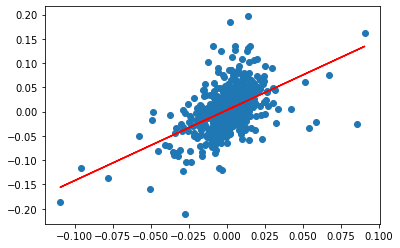

In [18]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

In [19]:
#### Pull data for Microsoft from Yahoo Finance & Save as DataFrame

In [20]:
df_msoft = web.DataReader('MSFT','yahoo',start,end)
df_msoft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,172.919998,162.309998,165.309998,172.789993,71030800.0,169.275467
2020-03-03,175.000000,162.259995,173.800003,164.509995,71677000.0,161.163864
2020-03-04,170.699997,165.619995,168.490005,170.550003,49814400.0,167.081055
2020-03-05,170.869995,165.690002,166.050003,166.270004,47817300.0,162.888092
2020-03-06,163.110001,156.000000,162.610001,161.570007,72821100.0,158.283691


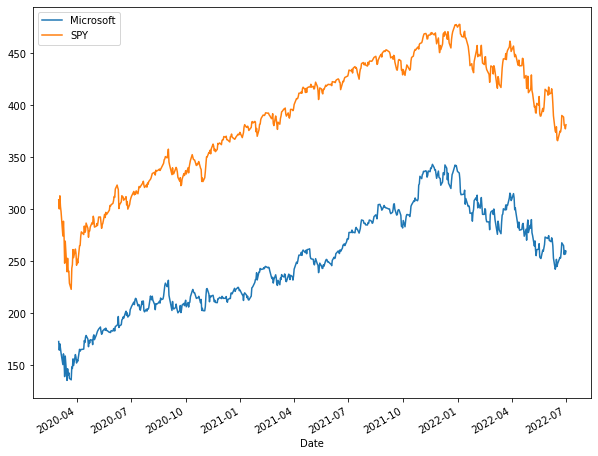

In [21]:
df_msoft['Close'].plot(label = 'Microsoft', figsize=(10, 8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

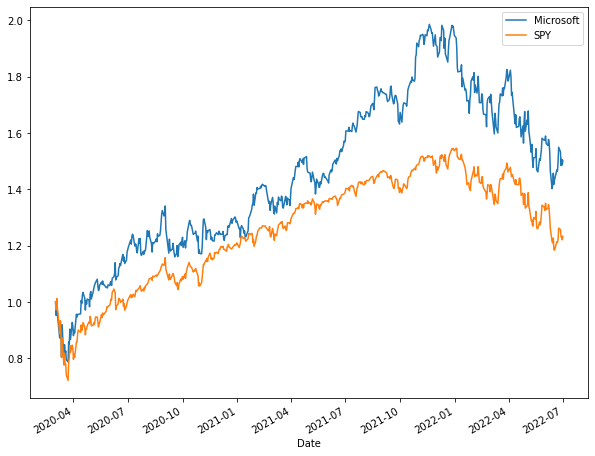

In [31]:
df_msoft['Cumu'] = df_msoft['Close']/df_msoft['Close'].iloc[0] 
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

df_msoft['Cumu'].plot(label = 'Microsoft', figsize=(10, 8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

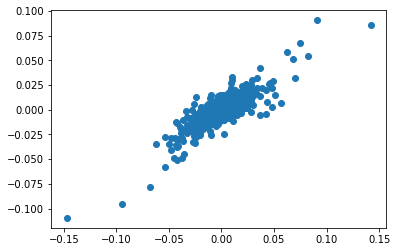

In [32]:
df_msoft['daily_ret'] = df_msoft['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)
plt.scatter(df_msoft['daily_ret'],df_spy['daily_ret'])

In [33]:
daily_prices = pd.concat([df_msoft['Close'], df_spy['Close']], axis=1)
daily_prices.columns = ['Microsoft', 'SPY']

print(daily_prices.head())

             Microsoft         SPY
Date                              
2020-03-02  172.789993  309.089996
2020-03-03  164.509995  300.239990
2020-03-04  170.550003  312.859985
2020-03-05  166.270004  302.459991
2020-03-06  161.570007  297.459991


In [34]:
daily_returns = daily_prices.pct_change(1)
print(daily_returns.head())

            Microsoft       SPY
Date                           
2020-03-02        NaN       NaN
2020-03-03  -0.047919 -0.028632
2020-03-04   0.036715  0.042033
2020-03-05  -0.025095 -0.033242
2020-03-06  -0.028267 -0.016531


In [35]:
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0) 
print(clean_daily_returns.head())

            Microsoft       SPY
Date                           
2020-03-03  -0.047919 -0.028632
2020-03-04   0.036715  0.042033
2020-03-05  -0.025095 -0.033242
2020-03-06  -0.028267 -0.016531
2020-03-09  -0.067773 -0.078094


In [36]:
X = clean_daily_returns['SPY'].values.reshape(-1, 1)
y = clean_daily_returns['Microsoft'].values.reshape(-1, 1)

In [37]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [38]:
lr.coef_

array([[1.14986583]])

In [39]:
lr.intercept_

array([0.0003679])

In [40]:
# x coef: 1.14398066
# Constant coef: 0.00069205
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred =  lr.coef_ * X + lr.intercept_
y_pred

array([[-3.25555811e-02],
       [ 4.87002427e-02],
       [-3.78555776e-02],
       [-1.86406577e-02],
       [-8.94302598e-02],
       [ 5.98675869e-02],
       [-5.56862717e-02],
       [-1.09647996e-01],
       [ 9.86656820e-02],
       [-1.25454711e-01],
       [ 6.24515330e-02],
       [-5.78531647e-02],
       [ 2.81134172e-03],
       [-5.56169596e-02],
       [-2.90321057e-02],
       [ 1.04549498e-01],
       [ 1.75816026e-02],
       [ 6.75083417e-02],
       [-3.38816063e-02],
       [ 3.77106186e-02],
       [-1.67712898e-02],
       [-5.13816629e-02],
       [ 2.69015095e-02],
       [-1.62524792e-02],
       [ 7.76000380e-02],
       [ 1.54016869e-03],
       [ 3.89670759e-02],
       [ 1.78658266e-02],
       [-1.01305473e-02],
       [ 3.42807476e-02],
       [-2.40645622e-02],
       [ 5.91519559e-03],
       [ 3.14320307e-02],
       [-1.98904111e-02],
       [-3.45457619e-02],
       [ 2.58886470e-02],
       [ 2.85424563e-04],
       [ 1.63955481e-02],
       [ 1.6

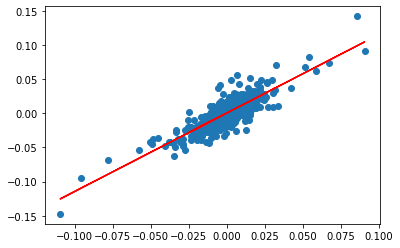

In [41]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

## Linear regression to predict house prices

In [2]:
# Import the libraries
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [3]:
# Import Data Set
# Load the CSV file.
hp = pd.read_csv('house_prices.csv')  

# Print the DataFrame.
hp.head() 

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


In [4]:
# View the DataFrame.
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     506 non-null    float64
 1   Distance  506 non-null    float64
 2   Value     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [5]:
# Descriptive statistics.
hp.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


In [6]:
# Set the variables, fitting the model & calling the predictions for X
# Define the dependent variable.
y = hp['Value']  

# Define the independent variable.
# Capital X because we have multiple variables = SET of variables.
X = hp[['Rooms', 'Distance']] 

In [7]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

# Call the predictions for X (array).
mlr.predict(X) 

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776,
       24.92052548, 20.99628003, 22.59515685, 17.89792552, 21.43016488,
       24.59312806, 21.29554669, 19.86012857, 20.02480328, 21.19854962,
       18.91052046, 19.79946305, 20.16587486, 15.24036623, 17.62554884,
       16.24441157, 19.82577837, 21.36632302, 18.52848931, 19.65425152,
       16.82067934, 18.81534563, 20.76312523, 24.70679323, 26.17680132,
       17.71571146, 20.84706509, 19.68285587, 17.39216584, 20.85532906,
       19.22540394, 18.42427779, 18.77543693, 19.75391977, 26.04958067,
       29.82538634, 27.7461615 , 22.45651299, 22.82617229, 21.57637181,
       17.86689491, 18.78224174, 21.21771802, 15.7523132 , 17.64542212,
       21.17812468, 22.51593928, 26.00129836, 21.48617409, 20.7648873 ,
       33.41670435, 26.03470634, 29.42393915, 23.26887906, 20.91861579,
       19.42498135, 21.20638654, 25.71803969, 28.7805479 , 32.39778062,
       23.95685233, 19.52974218, 20.27518634, 17.77558538, 20.33

In [8]:
# Check the value of R Squared, the intercept & the co-efficients.
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

# Note that the output is for all the independent variables!
# Adjusted R2 is used to compare the predictive value of various models with different numbers of 
# independent variables. R2 is positively correlated with the number of independent variables
# so R2 cant be used to compare quality of performance between models.
# Adjusted R2 can be used!
# Intercept has little to no sense here in MLR.

R-squared:  0.4955246476058477
Intercept:  -34.636050175473315
Coefficients:


[('Rooms', 8.801411828632594), ('Distance', 0.48884853656712307)]

In [9]:
# Make predictions
# Create a variable 'New_Rooms' and define it as 5.7.
New_Rooms = 5.75

# Create 'New_Distance' and define it as 15.2.
New_Distance = 15.2  

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[New_Rooms ,New_Distance]]))  

Predicted Value: 
 [23.40256559]


In [10]:
# Train and test subsets with MLR (multiple linear regression)
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,
                                                                            y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

# Note test data set is 20% of the whole data set.

In [11]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

# This is for the test dataset only & so R2 for example is different from the whole data set earlier.
# Smaller the std err the better
# t= co-eff/std err
# Inverse relationship between t value and P
# P value is the statistical significance test.
# by default, P is two tailed test.
# If P value is small, then variable is significant.
# 95% confident that the true impact of room to house price is between 7.488 & 9.482
# 95% confident that the true impact of distance to house price is between 0.224 & 0.896

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.33e-52
Time:                        19:19:34   Log-Likelihood:                -1352.5
No. Observations:                 404   AIC:                             2711.
Df Residuals:                     401   BIC:                             2723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.8597      3.141    -10.462      0.0

In [12]:
# Run a regression test.
# Specify the model.
mlr = LinearRegression()  

# Fit the model.
mlr.fit(X_test, Y_test)  

LinearRegression()

In [13]:
# Call the predictions for X in the test set.
y_pred_mlr= mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [39.5007791  26.01220208 23.40571915  7.97760017 36.32952212 12.03353551
 28.71120259 26.60195665 26.25329031 23.55549835 33.39311645 19.5529638
 19.00355373 31.74108834 24.80646556 19.47964643  5.31935431 13.00959399
 13.16804638 16.45968889  9.9881162  22.77207093 41.65869276 23.16761129
 31.08463065 17.53857053 23.35625302 20.93113313 23.23435817 26.88390622
 17.57037584 13.14888443 17.83727856 32.90891385 24.76823466 22.30287688
 25.7837162  17.95773792 42.81614435 29.98205908 20.86835099  9.16135295
 25.43949309 18.91471376 25.41807537 29.06482076  4.2661231  18.64474863
 20.12296035 20.63616287 20.29657713 20.67154466 22.45611771 20.39267666
 16.03630521 24.5691534  37.39196791 24.31316323 26.69493635 19.82799285
 19.39924173 19.58999435 15.91856374 28.31314942 20.44430288 12.49256072
 24.51304292 22.0135639  19.43232398 18.35263298 23.8752249  20.37453461
 16.0758568  27.31107959 14.9534151  28.7072379  17.87693131 14.90371929
 32.16362438 19.03792108 21

In [14]:
# Print the R-squared value.
print(mlr.score(X_test,Y_test)*100)  
# This is expressed now as a %age.

71.03671013608054


## Multicollinearity

When there are high correlations between two or more independent variables in MLR. This causes unreliable estimates. 

The **Variance Inflation Factor** measures correlation between independent variables and strength of correlation. If VIF value is:

- 1, then there is no correlation between independent variables.
- Between 1 & 5 suggests correlation is moderate but not enough to warrant fixing.
- Greater than 5 is a problem and estimates will have large standard errors and unreliable p values.
- VIF range can be between 1 (no linear correlation) and infinity.

If std error in OLS is close to 0 then no need to worry about multicollinearity as a starting point. 

In [16]:
# Check for multicollinearity with python
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. vif["VIF Factor"] = [variance_inflation_factor(x_temp.values,
#i) for i in range(x_temp.values.shape[1])]  
# Calculate the ‘vif’ for each value.
vif = pd.DataFrame()  
# Calculate the VIF
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range
                     (x_temp.values.shape[1])]
# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

# Note VIF is 1.04 so no issue of multi-collinearity

   VIF Factor  features
0       83.56     const
1        1.04     Rooms
2        1.04  Distance


In [17]:
# Evaluate the model
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))

# Closer to MAE is to 0 the better
# MSE is alternative but not substitute for MAE. 
# MSE benchmark for perfection is 0 but unrealistic.
# These are all used to measure relative performance of one model over another.

Mean Absolute Error (Final): 3.4749451018628648
Mean Square Error (Final): 24.056805405025848


### 1.3.5 Practical Activity: Conducting MLR using Python.

In [19]:
#Import all the necessary packages:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [20]:
# Import the data set.
df_ecom = pd.read_csv('Ecommerce_data.csv')

# View the DataFrame.
df_ecom

,Sale,por_OS,por_NON,recc,avg_no_it,age,dis,diff_reg,tax,bk,lowstat,Median_s
0,0.63,18.0,2.31,0,6.575,65.2,4.0900,1,296,396.90,4.98,24.0
1,2.73,0.0,7.07,0,6.421,78.9,4.9671,2,242,396.90,9.14,21.6
2,2.73,0.0,7.07,0,7.185,61.1,4.9671,2,242,392.83,4.03,34.7
3,3.24,0.0,2.18,0,6.998,45.8,6.0622,3,222,394.63,2.94,33.4
4,6.91,0.0,2.18,0,7.147,54.2,6.0622,3,222,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,6.26,0.0,11.93,0,6.593,69.1,2.4786,1,273,391.99,9.67,22.4
502,4.53,0.0,11.93,0,6.120,76.7,2.2875,1,273,396.90,9.08,20.6
503,6.08,0.0,11.93,0,6.976,91.0,2.1675,1,273,396.90,5.64,23.9
504,10.96,0.0,11.93,0,6.794,89.3,2.3889,1,273,393.45,6.48,22.0


In [21]:
# View the metadata.
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sale       506 non-null    float64
 1   por_OS     506 non-null    float64
 2   por_NON    506 non-null    float64
 3   recc       506 non-null    int64  
 4   avg_no_it  506 non-null    float64
 5   age        506 non-null    float64
 6   dis        506 non-null    float64
 7   diff_reg   506 non-null    int64  
 8   tax        506 non-null    int64  
 9   bk         506 non-null    float64
 10  lowstat    506 non-null    float64
 11  Median_s   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


In [22]:
# Define the variables
# Dependent variables.
y = df_ecom['Median_s'] 
X = df_ecom[['avg_no_it', 'tax']] 

In [23]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [24]:
# Specify the model.
multi = LinearRegression()  
multi.fit(x_train, y_train)

LinearRegression()

In [25]:
multi.predict(x_train)

array([19.68077167, 38.76268832, 15.79429553, 23.49922927, 19.2739039 ,
        8.11113341, 22.59791218, 14.06288888, 26.39447012, 21.86039213,
       19.79545594, 30.26529047, 21.22777796, 21.44808858, 20.79264432,
       23.45370907, 21.97392517, 18.46339447, 23.11847005, 34.4541126 ,
       25.78072075, 19.76882387, 23.04084157, 26.82686538, 17.75595394,
       22.13454223, 20.1246662 , 37.45556138, 34.46353646, 25.41954164,
       14.71226966, 21.05474884, 20.37149849, 22.93705789, 11.66858537,
        5.63570732, 25.934629  , 26.27064708, 22.2364656 , 21.61934447,
       17.77360377, 18.96641292, 31.56527838, 15.15597811, 26.66444607,
       20.36881247, 24.43706724, 23.85868181, 18.76614735, 24.03793148,
       19.70204364, 17.6314042 , 21.96729204, 33.05748004, 11.14180696,
       25.42261122, 31.1691132 , 31.06150421, 21.95950768, 28.04224855,
       18.54177868, 31.03384325, 24.53573494, 19.40072084, 20.55261985,
       21.02538463, 30.45308592, -2.85702811, 24.909733  , 19.05

In [26]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(x_train, y_train))
print("Intercept: ", multi.intercept_)
print("Coefficients:")
list(zip(x_train, multi.coef_))

R-squared:  0.516326158853115
Intercept:  -19.670179474543467
Coefficients:


[('avg_no_it', 7.784358782154019), ('tax', -0.016376802195044216)]

In [27]:
# Make predictions.
New_Value1 = 5.75
New_Value2 = 15.2
print ('Predicted Value: \n', multi.predict([[New_Value1 ,New_Value2]]))  

Predicted Value: 
 [24.84095613]


In [28]:
# Training and testing subsets with MLR
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_train))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Median_s   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     214.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           5.66e-64
Time:                        19:42:50   Log-Likelihood:                -1326.1
No. Observations:                 404   AIC:                             2658.
Df Residuals:                     401   BIC:                             2670.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6702      3.347     -5.877      0.0

In [29]:
print(multi.score(x_train,y_train)*100)
# R squared expressed as % 

51.632615885311495


#### Check the model with OLS

In [30]:
# Run regression on the train subset.
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [31]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_train))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Median_s   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     214.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           5.66e-64
Time:                        19:44:41   Log-Likelihood:                -1326.1
No. Observations:                 404   AIC:                             2658.
Df Residuals:                     401   BIC:                             2670.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6702      3.347     -5.877      0.0

In [32]:
y_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [19.68077167 38.76268832 15.79429553 23.49922927 19.2739039   8.11113341
 22.59791218 14.06288888 26.39447012 21.86039213 19.79545594 30.26529047
 21.22777796 21.44808858 20.79264432 23.45370907 21.97392517 18.46339447
 23.11847005 34.4541126  25.78072075 19.76882387 23.04084157 26.82686538
 17.75595394 22.13454223 20.1246662  37.45556138 34.46353646 25.41954164
 14.71226966 21.05474884 20.37149849 22.93705789 11.66858537  5.63570732
 25.934629   26.27064708 22.2364656  21.61934447 17.77360377 18.96641292
 31.56527838 15.15597811 26.66444607 20.36881247 24.43706724 23.85868181
 18.76614735 24.03793148 19.70204364 17.6314042  21.96729204 33.05748004
 11.14180696 25.42261122 31.1691132  31.06150421 21.95950768 28.04224855
 18.54177868 31.03384325 24.53573494 19.40072084 20.55261985 21.02538463
 30.45308592 -2.85702811 24.909733   19.05594186 17.05358842 21.07872391
 22.54333459 12.74517546 19.53717674 29.52410786 22.68984204 16.15237603
 31.01355975 36.30385414 2

In [33]:
print(mlr.score(x_train,y_train)*100)

51.632615885311495


In [34]:
meanAbErr = metrics.mean_absolute_error(y_train, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_train, y_pred_mlr)

print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 56.03
Mean Absolute Error: 4.257056211181979
Mean Square Error: 41.54840402298601


In [35]:
New_Value1 = 5.75
New_Value2 = 15.2
print ("Predicted Value: \n", mlr.predict([[New_Value1 ,New_Value2]])) 

Predicted Value: 
 [24.84095613]


In [37]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range
                     (x_temp.values.shape[1])]
vif['features'] = x_temp.columns
print(vif.round(1))

   VIF Factor   features
0       108.1      const
1         1.1  avg_no_it
2         1.1        tax


In [38]:
# Heteroscedasticity?
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [39]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 25.71361477472052, 'LM Test p-value': 2.6083117438457607e-06, 'F-stat': 13.62877429295051, 'F-test p-value': 1.8775385253290402e-06}


`Note:` We always fit the model to train data and evaluate the performance of the model using the test data. We predict the test data and compare the predictions with actual test values.
- rerun the model on the test data and jot down your observation.